# Preparando os dados e criando modelos

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../data/processed/pronto.csv')

In [3]:
df

,ano,territorio,num_empresas,populacao,razao_pop_empresa
0,2007,Norte,2209,5591294,2531.142598
1,2007,Nordeste,7753,21887716,2823.128595
2,2007,Sudeste,26030,41134420,1580.269689
3,2007,Sul,12215,14342872,1174.201555
4,2007,Centro-Oeste,3384,6318814,1867.261820
...,...,...,...,...,...
65,2020,Norte,3316,8596692,2592.488540
66,2020,Nordeste,16288,29718750,1824.579445
67,2020,Sudeste,64975,50370550,775.229704
68,2020,Sul,36698,17177286,468.071448


In [4]:
# Teste ADF para verificar se a série é estacionária
resultado = adfuller(df["razao_pop_empresa"])
print(f"p-value: {resultado[1]}")

p-value: 0.039732080403563984


In [5]:
# Teste ADF para verificar se a série é estacionária
resultado = adfuller(df["populacao"])
print(f"p-value: {resultado[1]}")

p-value: 0.9966646672370681


In [6]:
resultado = adfuller(df["num_empresas"])
print(f"p-value: {resultado[1]}")

p-value: 0.13512030055464552


- Pelos resultados já sabemos que o parâmetro 'd' da previsão da coluna "razao_pop_empresa" é igual a 0

Processando região: Norte - num_empresas
RMSE para Norte (num_empresas): 537.7958
Processando região: Norte - populacao
RMSE para Norte (populacao): 7593.6433
Processando região: Nordeste - num_empresas
RMSE para Nordeste (num_empresas): 517.4852
Processando região: Nordeste - populacao
RMSE para Nordeste (populacao): 32230.8806
Processando região: Sudeste - num_empresas
RMSE para Sudeste (num_empresas): 1379.5610
Processando região: Sudeste - populacao
RMSE para Sudeste (populacao): 38483.7391
Processando região: Sul - num_empresas
RMSE para Sul (num_empresas): 1900.0000
Processando região: Sul - populacao
RMSE para Sul (populacao): 11681.2135
Processando região: Centro-Oeste - num_empresas
RMSE para Centro-Oeste (num_empresas): 856.5365
Processando região: Centro-Oeste - populacao
RMSE para Centro-Oeste (populacao): 13667.4623


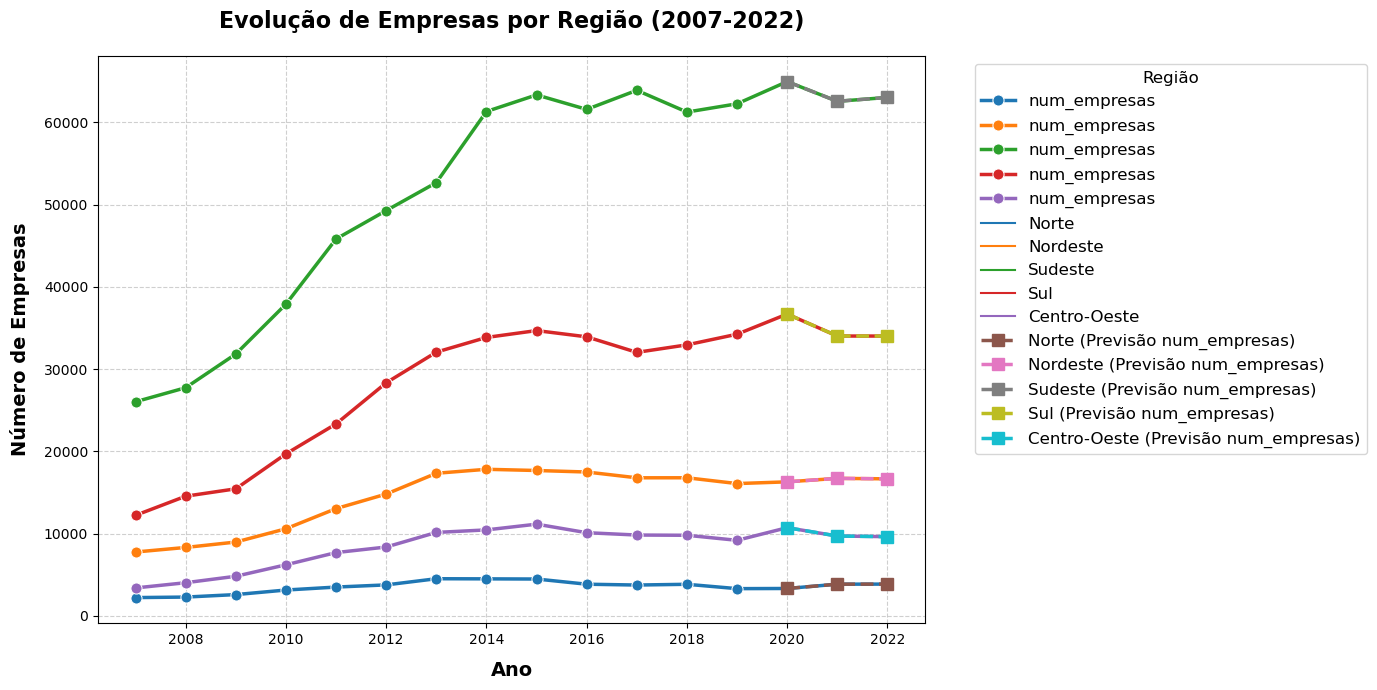

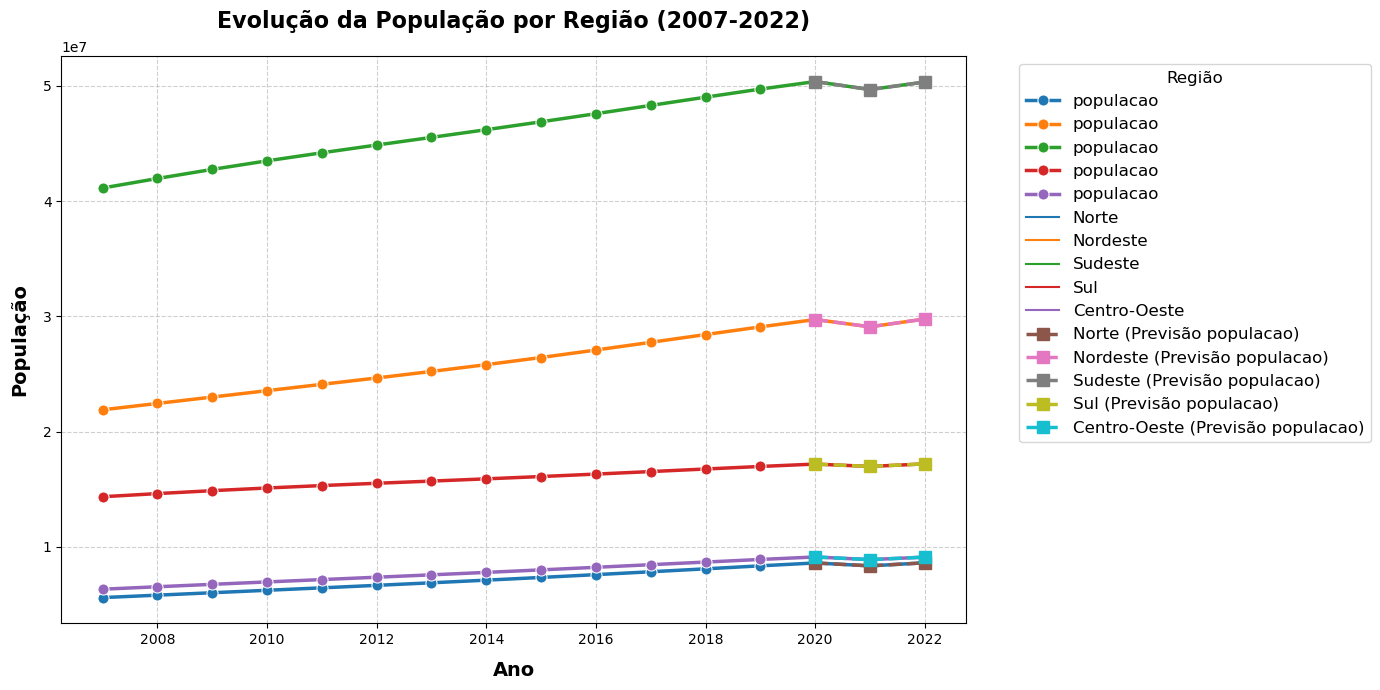

In [7]:
# Previsões para 2021 e 2022 para num_empresas e populacao
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
resultados = {'num_empresas': {}, 'populacao': {}}

for regiao in regioes:
    # Filtrar dados para a região
    df_regiao = df[df['territorio'] == regiao]
    
    # Dividir em treino (2007-2018) e validação (2019-2020)
    treino = df_regiao[df_regiao['ano'] <= 2018]
    teste = df_regiao[df_regiao['ano'] >= 2019]
    
    # Ajuste de parâmetros e previsão para num_empresas
    if regiao == 'Norte':
        print(f"Processando região: {regiao} - num_empresas")
        model_num_empresas = ARIMA(treino['num_empresas'], order=(1, 1, 1))  # Ajuste de parâmetros específico para Norte
    elif regiao == 'Nordeste':
        print(f"Processando região: {regiao} - num_empresas")
        model_num_empresas = ARIMA(treino['num_empresas'], order=(1, 1, 1))  # Ajuste de parâmetros específico para Nordeste
    elif regiao == 'Sudeste':
        print(f"Processando região: {regiao} - num_empresas")
        model_num_empresas = ARIMA(treino['num_empresas'], order=(2, 1, 1))  # Ajuste de parâmetros específico para Sudeste
    elif regiao == 'Sul':
        print(f"Processando região: {regiao} - num_empresas")
        model_num_empresas = ARIMA(treino['num_empresas'], order=(2, 1, 1))  # Ajuste de parâmetros específico para Sul
    elif regiao == 'Centro-Oeste':
        print(f"Processando região: {regiao} - num_empresas")
        model_num_empresas = ARIMA(treino['num_empresas'], order=(1, 1, 1))  # Ajuste de parâmetros específico para Centro-Oeste
    
    model_num_empresas_fit = model_num_empresas.fit()
    previsao_num_empresas = model_num_empresas_fit.forecast(steps=len(teste))
    rmse_num_empresas = np.sqrt(mean_squared_error(teste['num_empresas'], previsao_num_empresas))
    print(f"RMSE para {regiao} (num_empresas): {rmse_num_empresas:.4f}")
    
    previsoes_futuras_num_empresas = model_num_empresas_fit.forecast(steps=2)
    resultados['num_empresas'][regiao] = previsoes_futuras_num_empresas

    # Ajuste de parâmetros e previsão para populacao
    if regiao == 'Norte':
        print(f"Processando região: {regiao} - populacao")
        model_populacao = ARIMA(treino['populacao'], order=(1, 2, 1))  # Ajuste de parâmetros específico para Norte
    elif regiao == 'Nordeste':
        print(f"Processando região: {regiao} - populacao")
        model_populacao = ARIMA(treino['populacao'], order=(1, 2, 1))  # Ajuste de parâmetros específico para Nordeste
    elif regiao == 'Sudeste':
        print(f"Processando região: {regiao} - populacao")
        model_populacao = ARIMA(treino['populacao'], order=(1, 1, 1))  # Ajuste de parâmetros específico para Sudeste
    elif regiao == 'Sul':
        print(f"Processando região: {regiao} - populacao")
        model_populacao = ARIMA(treino['populacao'], order=(1, 2, 1))  # Ajuste de parâmetros específico para Sul
    elif regiao == 'Centro-Oeste':
        print(f"Processando região: {regiao} - populacao")
        model_populacao = ARIMA(treino['populacao'], order=(1, 1, 1))  # Ajuste de parâmetros específico para Centro-Oeste

    model_populacao_fit = model_populacao.fit()
    previsao_populacao = model_populacao_fit.forecast(steps=len(teste))
    rmse_populacao = np.sqrt(mean_squared_error(teste['populacao'], previsao_populacao))
    print(f"RMSE para {regiao} (populacao): {rmse_populacao:.4f}")
    
    previsoes_futuras_populacao = model_populacao_fit.forecast(steps=2)
    resultados['populacao'][regiao] = previsoes_futuras_populacao

# Converter resultados em DataFrame
df_resultados_num_empresas = pd.DataFrame(resultados['num_empresas'])
df_resultados_num_empresas['ano'] = [2021, 2022]  # Adicionar coluna de ano

df_resultados_populacao = pd.DataFrame(resultados['populacao'])
df_resultados_populacao['ano'] = [2021, 2022]  # Adicionar coluna de ano

# Transformar os DataFrames de previsões para o mesmo formato do DataFrame original
df_previsoes_num_empresas = df_resultados_num_empresas.melt(id_vars=['ano'], var_name='territorio', value_name='num_empresas')
df_previsoes_populacao = df_resultados_populacao.melt(id_vars=['ano'], var_name='territorio', value_name='populacao')

# Concatenar dados históricos com previsões
df_completo_num_empresas = pd.concat([df[['ano', 'territorio', 'num_empresas']], df_previsoes_num_empresas], ignore_index=True)
df_completo_populacao = pd.concat([df[['ano', 'territorio', 'populacao']], df_previsoes_populacao], ignore_index=True)

# Arredondar para 0 casas decimais
df_completo_populacao['populacao'] = df_completo_populacao['populacao'].round(0)

# Ajustar o tamanho do gráfico
plt.figure(figsize=(14, 7))

# Gráfico para num_empresas
sns.lineplot(data=df_completo_num_empresas, x="ano", y="num_empresas", hue="territorio", marker="o", markersize=8, linewidth=2.5, label="num_empresas")

# Destacar as previsões (2021 e 2022) com estilo diferente para num_empresas
for regiao in regioes:
    dados_previsao_num_empresas = df_completo_num_empresas[(df_completo_num_empresas['territorio'] == regiao) & (df_completo_num_empresas['ano'] >= 2020)]
    plt.plot(dados_previsao_num_empresas['ano'], dados_previsao_num_empresas['num_empresas'], linestyle='--', marker='s', markersize=8, linewidth=2.5, label=f'{regiao} (Previsão num_empresas)')

# Ajustar título e rótulos para num_empresas
plt.title("Evolução de Empresas por Região (2007-2022)", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Ano", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Número de Empresas", fontsize=14, fontweight="bold", labelpad=10)

# Melhorar a legenda
plt.legend(title="Região", title_fontsize=12, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar grade sutil
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico de num_empresas
plt.show()

# Criar gráfico para populacao
plt.figure(figsize=(14, 7))

# Gráfico para populacao
sns.lineplot(data=df_completo_populacao, x="ano", y="populacao", hue="territorio", marker="o", markersize=8, linewidth=2.5, label="populacao")

# Destacar as previsões (2021 e 2022) com estilo diferente para populacao
for regiao in regioes:
    dados_previsao_populacao = df_completo_populacao[(df_completo_populacao['territorio'] == regiao) & (df_completo_populacao['ano'] >= 2020)]
    plt.plot(dados_previsao_populacao['ano'], dados_previsao_populacao['populacao'], linestyle='--', marker='s', markersize=8, linewidth=2.5, label=f'{regiao} (Previsão populacao)')

# Ajustar título e rótulos para populacao
plt.title("Evolução da População por Região (2007-2022)", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Ano", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("População", fontsize=14, fontweight="bold", labelpad=10)

# Melhorar a legenda
plt.legend(title="Região", title_fontsize=12, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar grade sutil
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico de populacao
plt.show()


- Os resultados obtidos a partir das previsões para 2021 e 2022 mostram que o modelo ARIMA conseguiu fornecer previsões razoáveis para o número de empresas e a população nas diversas regiões. No entanto, os valores de erro, medidos pelo RMSE (Root Mean Squared Error), variam entre as regiões e entre as variáveis analisadas.

Processando região: Norte
RMSE para Norte (razao_pop_empresa): 192.4767
Processando região: Nordeste
RMSE para Nordeste (razao_pop_empresa): 51.5793
Processando região: Sudeste
RMSE para Sudeste (razao_pop_empresa): 379.6445
Processando região: Sul
RMSE para Sul (razao_pop_empresa): 37.3710
Processando região: Centro-Oeste
RMSE para Centro-Oeste (razao_pop_empresa): 24.3470


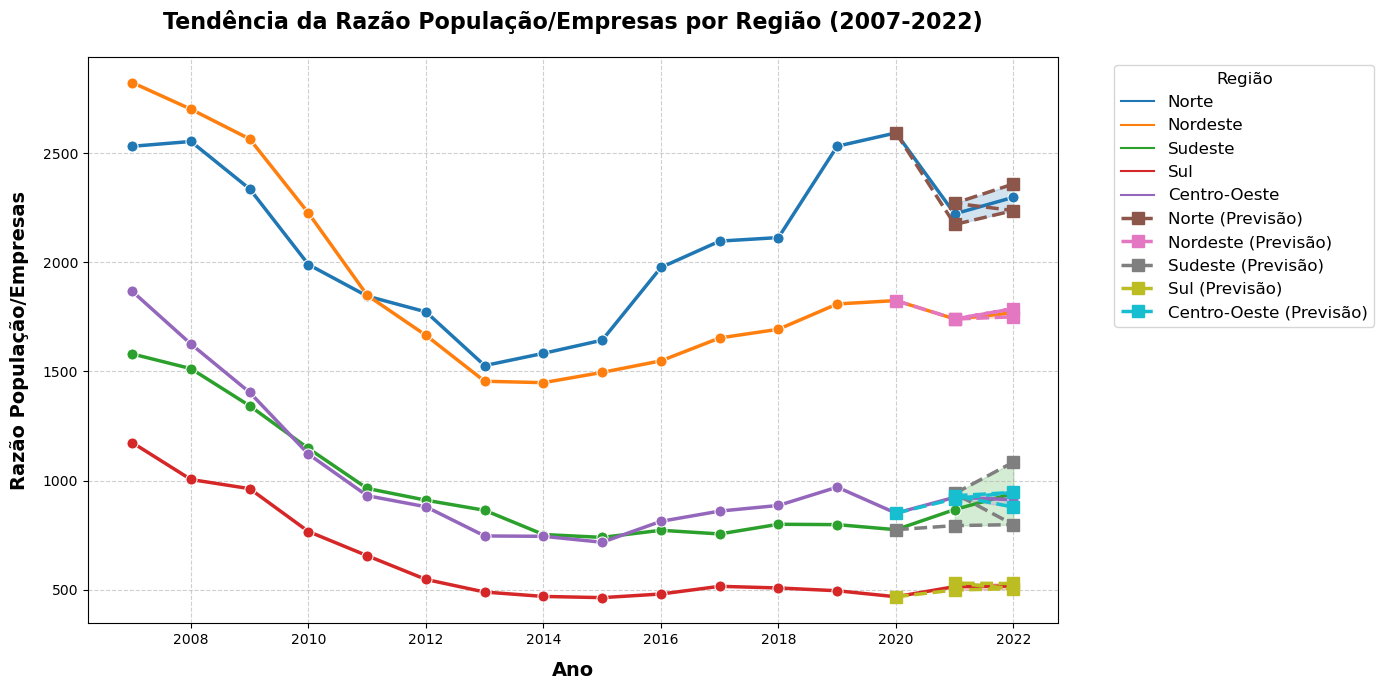

Previsões para 2021 e 2022:
          Norte     Nordeste      Sudeste         Sul  Centro-Oeste   ano
12  2270.330412  1739.865376   940.992462  530.247321    930.628023  2021
13  2358.709283  1750.084450  1084.987170  528.839393    878.873743  2022


In [8]:
# Ajuste de dados para razão população/empresas
df_completo_populacao['razao_pop_empresa'] = df_completo_populacao['populacao'] / df_completo_num_empresas['num_empresas']

# Previsões para 2021 e 2022
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
resultados = {}

for regiao in regioes:
    # Filtrar dados para a região
    df_regiao = df_completo_populacao[df_completo_populacao['territorio'] == regiao]
    
    # Dividir em treino (2007-2018) e validação (2019-2020)
    treino = df_regiao[df_regiao['ano'] <= 2018]
    teste = df_regiao[df_regiao['ano'] >= 2019]
    
    # Ajustar parâmetros do ARIMA para cada região
    print(f"Processando região: {regiao}")
    model = ARIMA(treino['razao_pop_empresa'], order=(2, 0, 4)) 
    
    # Treinar o modelo ARIMA
    model_fit = model.fit()
    
    # Fazer previsões para 2019-2020 (validação)
    previsao = model_fit.forecast(steps=len(teste))
    
    # Calcular o erro (RMSE)
    rmse = np.sqrt(mean_squared_error(teste['razao_pop_empresa'], previsao))
    print(f"RMSE para {regiao} (razao_pop_empresa): {rmse:.4f}")
    
    # Fazer previsões para 2021-2022
    previsoes_futuras = model_fit.forecast(steps=2)
    
    # Armazenar resultados
    resultados[regiao] = previsoes_futuras

# Converter resultados em DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados['ano'] = [2021, 2022]  # Adicionar coluna de ano

# Transformar o DataFrame de previsões para o mesmo formato do DataFrame original
df_previsoes = df_resultados.melt(id_vars=['ano'], var_name='territorio', value_name='razao_pop_empresa')

# Concatenar dados históricos com previsões
df_completo = pd.concat([df_completo_populacao, df_previsoes], ignore_index=True)

# Ajustar tamanho do gráfico
plt.figure(figsize=(14, 7))

# Criar gráfico de linhas para cada região (dados históricos)
sns.lineplot(data=df_completo, x="ano", y="razao_pop_empresa", hue="territorio", marker="o", markersize=8, linewidth=2.5)

# Destacar as previsões (2021 e 2022) com estilo diferente
for regiao in regioes:
    dados_previsao = df_completo[(df_completo['territorio'] == regiao) & (df_completo['ano'] >= 2020)]
    plt.plot(dados_previsao['ano'], dados_previsao['razao_pop_empresa'], linestyle='--', marker='s', markersize=8, linewidth=2.5, label=f'{regiao} (Previsão)')

# Ajustar o título e rótulos
plt.title("Tendência da Razão População/Empresas por Região (2007-2022)", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Ano", fontsize=14, fontweight="bold", labelpad=10)
plt.ylabel("Razão População/Empresas", fontsize=14, fontweight="bold", labelpad=10)

# Melhorar a legenda
plt.legend(title="Região", title_fontsize=12, fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionar grade sutil
plt.grid(True, linestyle='--', alpha=0.6)

# Ajustar layout para evitar cortes
plt.tight_layout()

# Exibir o gráfico
plt.show()

# Exibir previsões no console
print("Previsões para 2021 e 2022:")
print(df_resultados)


- Os resultados das previsões para a razão entre população e número de empresas (razao_pop_empresa) indicam um bom desempenho do modelo ARIMA, com diferentes erros (RMSE) entre as regiões. O valor do RMSE para cada região reflete a precisão do modelo, sendo que valores mais baixos indicam previsões mais precisas.